# Dissertation 

## Part 1 - Importing libraries, discovering datasets, plotting samples

### Import the necessary libraries

Imports the libraries needed for training, testing, hyperparameter tuning and obtaining the evaluation metrics of the MLP and CNN models on the EMNIST dataset. 

In [1]:
import numpy as np
import random
import tensorflow as tf
import os
import torch

SEED = 42

np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism() 
torch.manual_seed(SEED)

In [1]:
import numpy as np
import pandas as pd

from pandarallel import pandarallel

from housedatautils import HousingDataLoader
from housedatautils import HousingDataAnalysis
from housedatautils import GeoDataJSONLoader
from housedatautils import ColourizePredictionsDataset
from housedatautils import PropertyPriceMapPlotter
from housedatautils import PropertyPricePlotManager

from housemodels import DecisionTreeModel
from housemodels import LinearRegressionModel
from housemodels import XGBoostModel
from housemodels import LightGBMModel
from housemodels import RNNModel

import warnings

# Temporarily ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


### Import the developed packages

- housedatautils: modules to process and analyse the datasets before and after model training
- housedanodels: models... to be continued

In [2]:
house_data_loader = await HousingDataLoader()
house_data = await house_data_loader.load_uk_data()
house_data = house_data[house_data["Town_City"] == "SOUTH SHIELDS"]
house_data = house_data[house_data["Postcode"] != "NE34 6SS"].copy()

geo_data_loader = await GeoDataJSONLoader()
geo_data = await geo_data_loader.load_uk_data()
geo_data = geo_data[~geo_data["Postcode"].isin(["NE34 6SS"])].copy()

house_da = HousingDataAnalysis(house_data)

postcode_mapping = house_da.load_cached_data("postcode_mapping.pkl")

2023-09-18 19:18:23 - INFO - housedatautils.base_data_loader - [base_data_loader.py:133] - BaseDataLoader initialized
2023-09-18 19:18:23 - INFO - housedatautils.base_cache - [base_cache.py:73] - Cache path obtained from: preload/housing_data.pkl


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


2023-09-18 19:18:24 - INFO - housedatautils.base_data_loader - [base_data_loader.py:294] - Loaded cached data using pkl.
2023-09-18 19:18:25 - INFO - housedatautils.base_data_loader - [base_data_loader.py:236] - Pickle data cached
2023-09-18 19:18:28 - INFO - housedatautils.base_data_loader - [base_data_loader.py:239] - Parquet data cached
2023-09-18 19:18:30 - INFO - housedatautils.base_data_loader - [base_data_loader.py:133] - BaseDataLoader initialized
2023-09-18 19:18:30 - INFO - housedatautils.base_cache - [base_cache.py:73] - Cache path obtained from: preload/geo_data.pkl


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


2023-09-18 19:18:39 - INFO - housedatautils.base_data_loader - [base_data_loader.py:294] - Loaded cached data using pkl.
2023-09-18 19:18:48 - INFO - housedatautils.base_data_loader - [base_data_loader.py:236] - Pickle data cached
2023-09-18 19:19:00 - INFO - housedatautils.base_data_loader - [base_data_loader.py:239] - Parquet data cached


Pickle data loaded correctly from: postcode_mapping.pkl


In [3]:
geo_data

,mapit_code,Postcode,geometry,Postcode_prefix
0,HX20AA,HX2 0AA,"POLYGON ((-1.89578 53.72234, -1.89581 53.72235...",HX
1,HX20AB,HX2 0AB,"POLYGON ((-1.89743 53.72306, -1.89749 53.72297...",HX
2,HX20AD,HX2 0AD,"POLYGON ((-1.89631 53.72102, -1.89630 53.72119...",HX
3,HX20AE,HX2 0AE,"POLYGON ((-1.89983 53.72276, -1.89967 53.72247...",HX
4,HX20AG,HX2 0AG,"POLYGON ((-1.90024 53.72276, -1.90017 53.72224...",HX
...,...,...,...,...
1399877,S669QL,S66 9QL,"POLYGON ((-1.26066 53.39066, -1.26067 53.39052...",S
1399878,S669QN,S66 9QN,"MULTIPOLYGON (((-1.25718 53.39109, -1.25700 53...",S
1399879,S669QP,S66 9QP,"POLYGON ((-1.26146 53.39157, -1.26169 53.39145...",S
1399880,S669QQ,S66 9QQ,"POLYGON ((-1.26249 53.38982, -1.26242 53.38979...",S


In [4]:
sorted(house_data[house_data.Year > 2018]["Original Price"])

[500.0,
 4750.0,
 6300.0,
 10000.0,
 23000.0,
 25000.0,
 25000.0,
 27250.0,
 29750.0,
 31875.0,
 33000.0,
 33000.0,
 33000.0,
 34000.0,
 35000.0,
 35000.0,
 35000.0,
 36000.0,
 38000.0,
 38000.0,
 38150.0,
 39950.0,
 39950.0,
 39999.0,
 40000.0,
 40000.0,
 42000.0,
 42000.0,
 43000.0,
 45000.0,
 45000.0,
 46000.0,
 46226.0,
 48000.0,
 48666.666666666664,
 49000.0,
 50000.0,
 50000.0,
 50000.0,
 50000.0,
 50000.0,
 50000.0,
 50500.0,
 52000.0,
 52000.0,
 52500.0,
 52500.0,
 52666.666666666664,
 53333.333333333336,
 53500.0,
 54500.0,
 55000.0,
 55000.0,
 55000.0,
 55000.0,
 55000.0,
 56000.0,
 56000.0,
 56000.0,
 56500.0,
 57000.0,
 57000.0,
 57500.0,
 57816.666666666664,
 58000.0,
 58000.0,
 58500.0,
 58500.0,
 58650.0,
 58666.666666666664,
 59000.0,
 59500.0,
 59586.666666666664,
 59733.333333333336,
 60000.0,
 60000.0,
 60000.0,
 60000.0,
 60000.0,
 60000.0,
 60000.0,
 60000.0,
 60250.0,
 60500.0,
 60500.0,
 61000.0,
 61000.0,
 61000.0,
 61000.0,
 61750.0,
 62000.0,
 62000.0,
 62000.

In [5]:
house_da.show_price_categories()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0-5k,5k-20k,20k-50k,50k-100k,100k-200k,200k-500k,500k-750k,750k-1m,1m-1.5m,1.5m-2.5m,2.5m-5m,5m-10m


In [6]:
temp_house_data = house_da.remove_cheap_exp_groups(house_data,
                                                   cheapest_group="20k-50k",
                                                   expensive_group="1.5m-2.5m")
 
house_da.data = temp_house_data
house_da.show_price_categories()

,0,1,2,3,4,5,6
0,20k-50k,50k-100k,100k-200k,200k-500k,500k-750k,750k-1m,1m-1.5m


In [7]:
# house_da.get_selected_cities_to_plot()

In [8]:
cities = ["SOUTH SHIELDS"]
cities

['SOUTH SHIELDS']

In [9]:
house_da = HousingDataAnalysis(house_data)
temp_house_da = HousingDataAnalysis(temp_house_data)

In [10]:
model_data = temp_house_da.get_model_data()
model_data.head()

,Price,Old_New,Town_City,County,Year,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Property_Type_is__D,Property_Type_is__F,Property_Type_is__O,Property_Type_is__S,Property_Type_is__T
6488533,11.621789,0,0.0,0.0,2017,624841,3.705882,0.50,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488481,11.007657,0,0.0,0.0,2012,624712,4.547619,1.00,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488482,12.816746,0,0.0,0.0,2015,624712,4.547619,1.00,0.4,0.0,0,1,1,0.0,1,0,0,0,0
6488483,10.798575,0,0.0,0.0,2017,624712,4.547619,0.50,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488484,10.896758,0,0.0,0.0,2018,624712,4.547619,0.75,2.3,0.0,0,1,1,0.0,0,1,0,0,0


In [11]:
# model_data = model_data.drop(columns=["Property_Type_is__D", "Property_Type_is__F", "Property_Type_is__O", "Property_Type_is__S", "Property_Type_is__T"]).copy()

In [12]:
# Model data - to be saved
# temp_house_da.cache_data(model_data, "model_data_uk.pkl")

## Part 5 - Models

In [13]:
# model_data = house_da.load_cached_data("model_data_southshields.pkl")

In [14]:
feat_cols = ['Old_New', 'Town_City', 'County', 'Year', 
              'Postcode_encoded', 'Avg num of parks', 'Rate', 'Inflation rate',
              'Number_of_crimes', 'Nearest Station <3 km', 'Nearest Park <3 km',
              'Nearest Airport <20 km', 'Crimes_Buffer',
               'Property_Type_is__D',
              'Property_Type_is__F', 'Property_Type_is__O', 'Property_Type_is__S',
              'Property_Type_is__T']


In [15]:
model_data

,Price,Old_New,Town_City,County,Year,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Property_Type_is__D,Property_Type_is__F,Property_Type_is__O,Property_Type_is__S,Property_Type_is__T
6488533,11.621789,0,0.0,0.0,2017,624841,3.705882,0.50,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488481,11.007657,0,0.0,0.0,2012,624712,4.547619,1.00,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488482,12.816746,0,0.0,0.0,2015,624712,4.547619,1.00,0.4,0.0,0,1,1,0.0,1,0,0,0,0
6488483,10.798575,0,0.0,0.0,2017,624712,4.547619,0.50,2.6,0.0,0,1,1,0.0,0,1,0,0,0
6488484,10.896758,0,0.0,0.0,2018,624712,4.547619,0.75,2.3,0.0,0,1,1,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168309,12.028595,0,0.0,0.0,2015,624159,6.616438,1.00,0.4,0.0,0,1,1,0.0,0,1,0,0,0
4168303,11.931642,0,0.0,0.0,2010,624159,6.616438,1.00,2.5,0.0,0,1,1,0.0,0,0,0,1,0
4168307,12.100718,0,0.0,0.0,2013,624159,6.616438,1.00,2.3,0.0,0,1,1,0.0,0,0,0,0,1
4168312,12.072261,0,0.0,0.0,2014,624159,6.616438,1.00,1.5,0.0,0,1,1,0.0,0,0,0,0,1


### DT

In [17]:
# Initialize the model
dt = DecisionTreeModel(model_data, feat_cols)

# Hyperparameter tuning
# dt.tune()

# Train the model
dt.train()


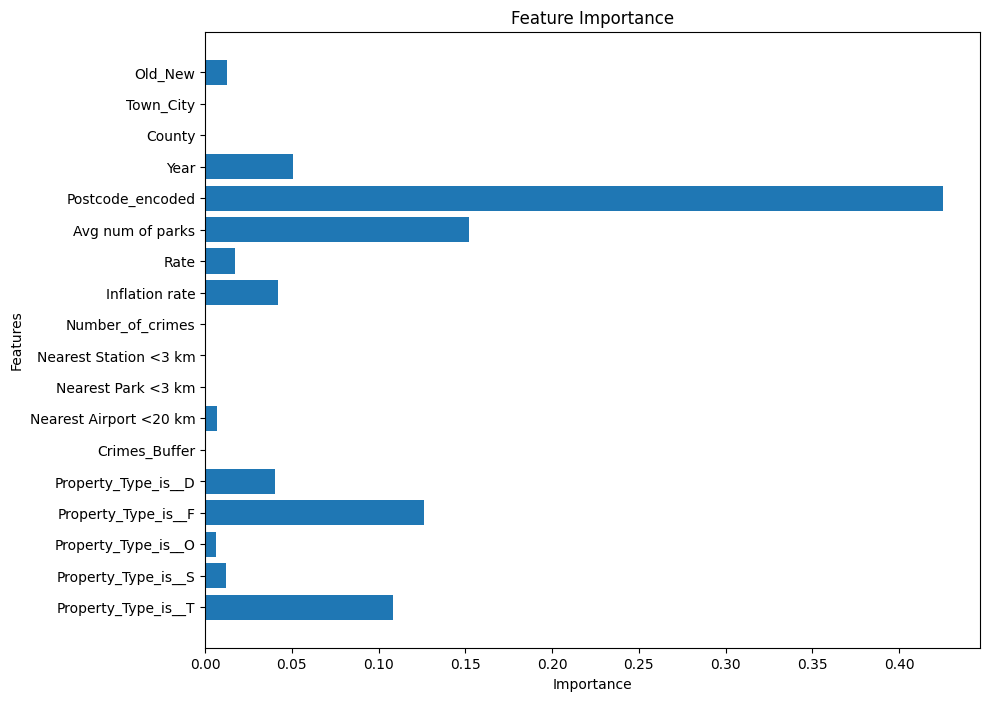

In [18]:
# dt.model.feature_importances_

import matplotlib.pyplot as plt

# Sample feature names for illustration (replace with your actual feature names)
features = feat_cols

importances = dt.model.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importances at the top
plt.show()


2023-09-18 19:19:27 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:52] - Colourised Module initialized
2023-09-18 19:19:35 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:130] - We are going to compare predictions now
2023-09-18 19:19:35 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:63] - Dataframe prepared
2023-09-18 19:19:35 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:88] - Merging geodata...
2023-09-18 19:19:37 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:99] - Metrics for area are to be settled
2023-09-18 19:19:47 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:101] - Assigning metrics colours
2023-09-18 19:20:17 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:192] - PPMapPlotter initialized


Number of decent predictions: 178
Total predictions: 630
Percentage of decent predictions: 28.25%


2023-09-18 19:20:18 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:342] - Saving images...
2023-09-18 19:20:24 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:484] - Saving results...


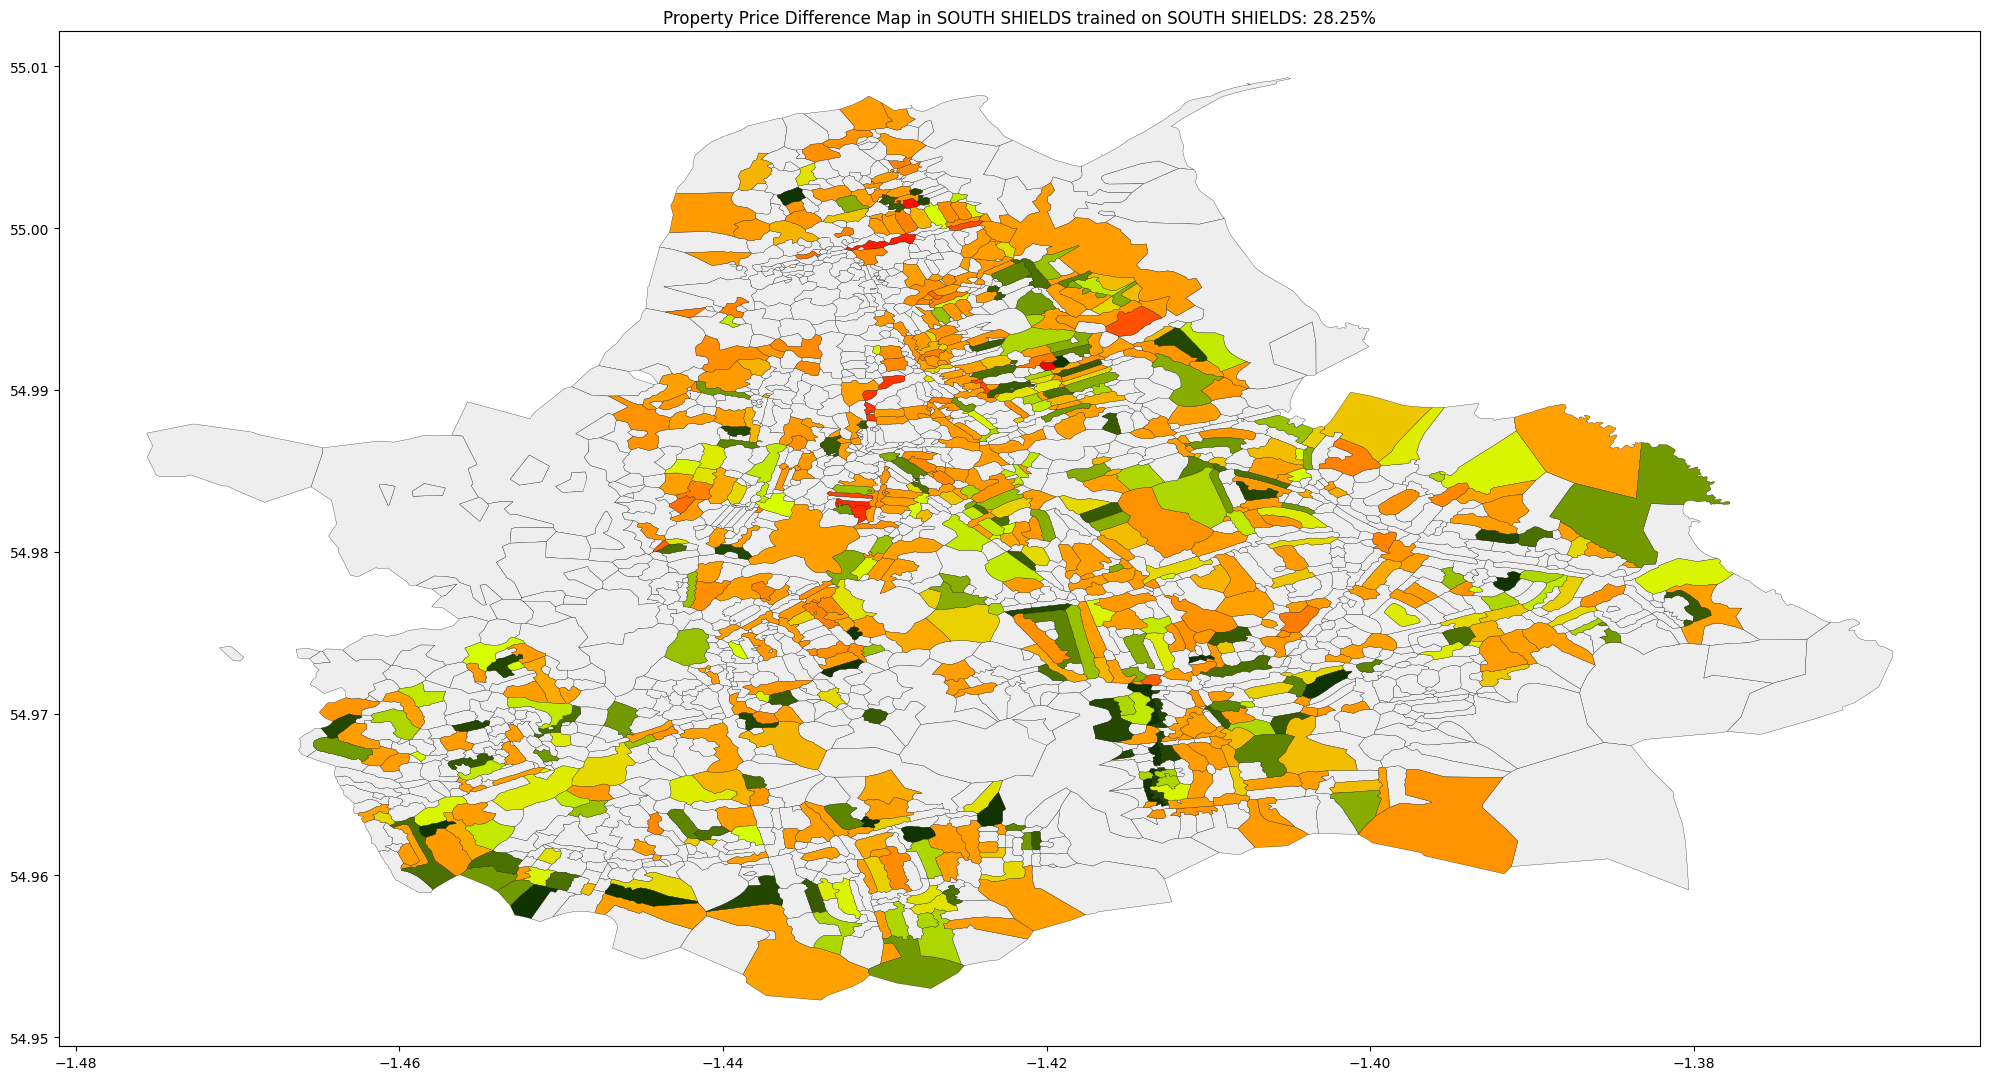

In [19]:
pppm = PropertyPricePlotManager(dt, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results()


In [20]:
dt.tune()     # Tune the model to find best hyperparameters
dt.train()    # Train the model using the best hyperparameters
predictions = dt.predict("test")  # This should now work without errors


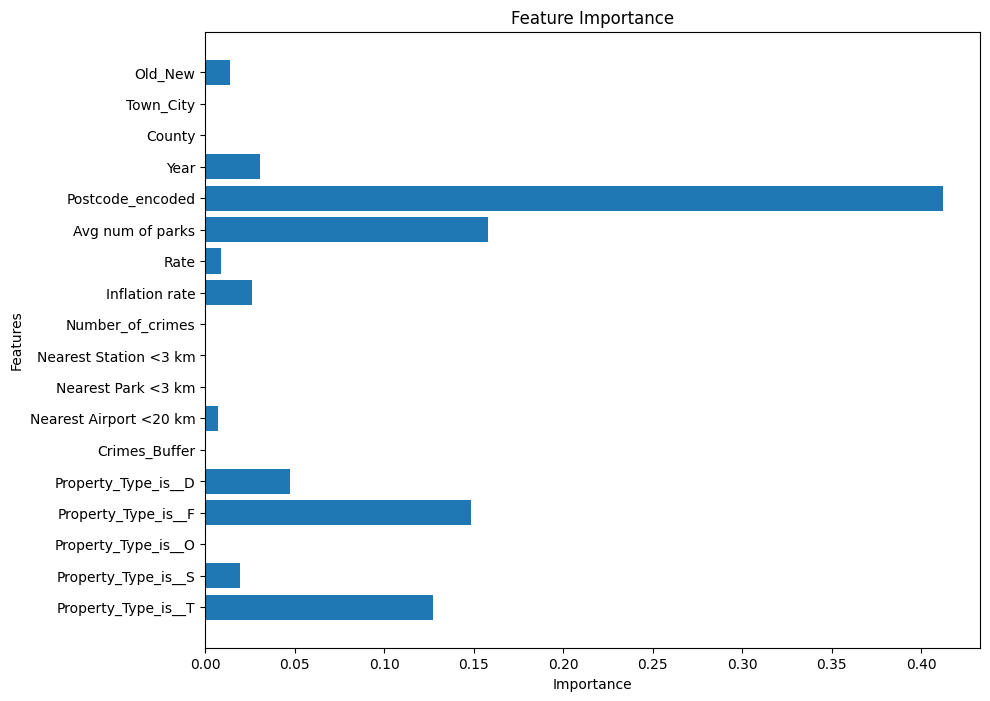

In [21]:
# dt.model.feature_importances_

import matplotlib.pyplot as plt

# Sample feature names for illustration (replace with your actual feature names)
features = feat_cols

importances = dt.model.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importances at the top
plt.show()


2023-09-18 19:20:28 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:52] - Colourised Module initialized
2023-09-18 19:20:34 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:130] - We are going to compare predictions now
2023-09-18 19:20:34 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:63] - Dataframe prepared
2023-09-18 19:20:34 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:88] - Merging geodata...
2023-09-18 19:20:35 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:99] - Metrics for area are to be settled
2023-09-18 19:20:43 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:101] - Assigning metrics colours
2023-09-18 19:21:10 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:192] - PPMapPlotter initialized


Number of decent predictions: 181
Total predictions: 630
Percentage of decent predictions: 28.73%


2023-09-18 19:21:11 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:342] - Saving images...
2023-09-18 19:21:16 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:484] - Saving results...


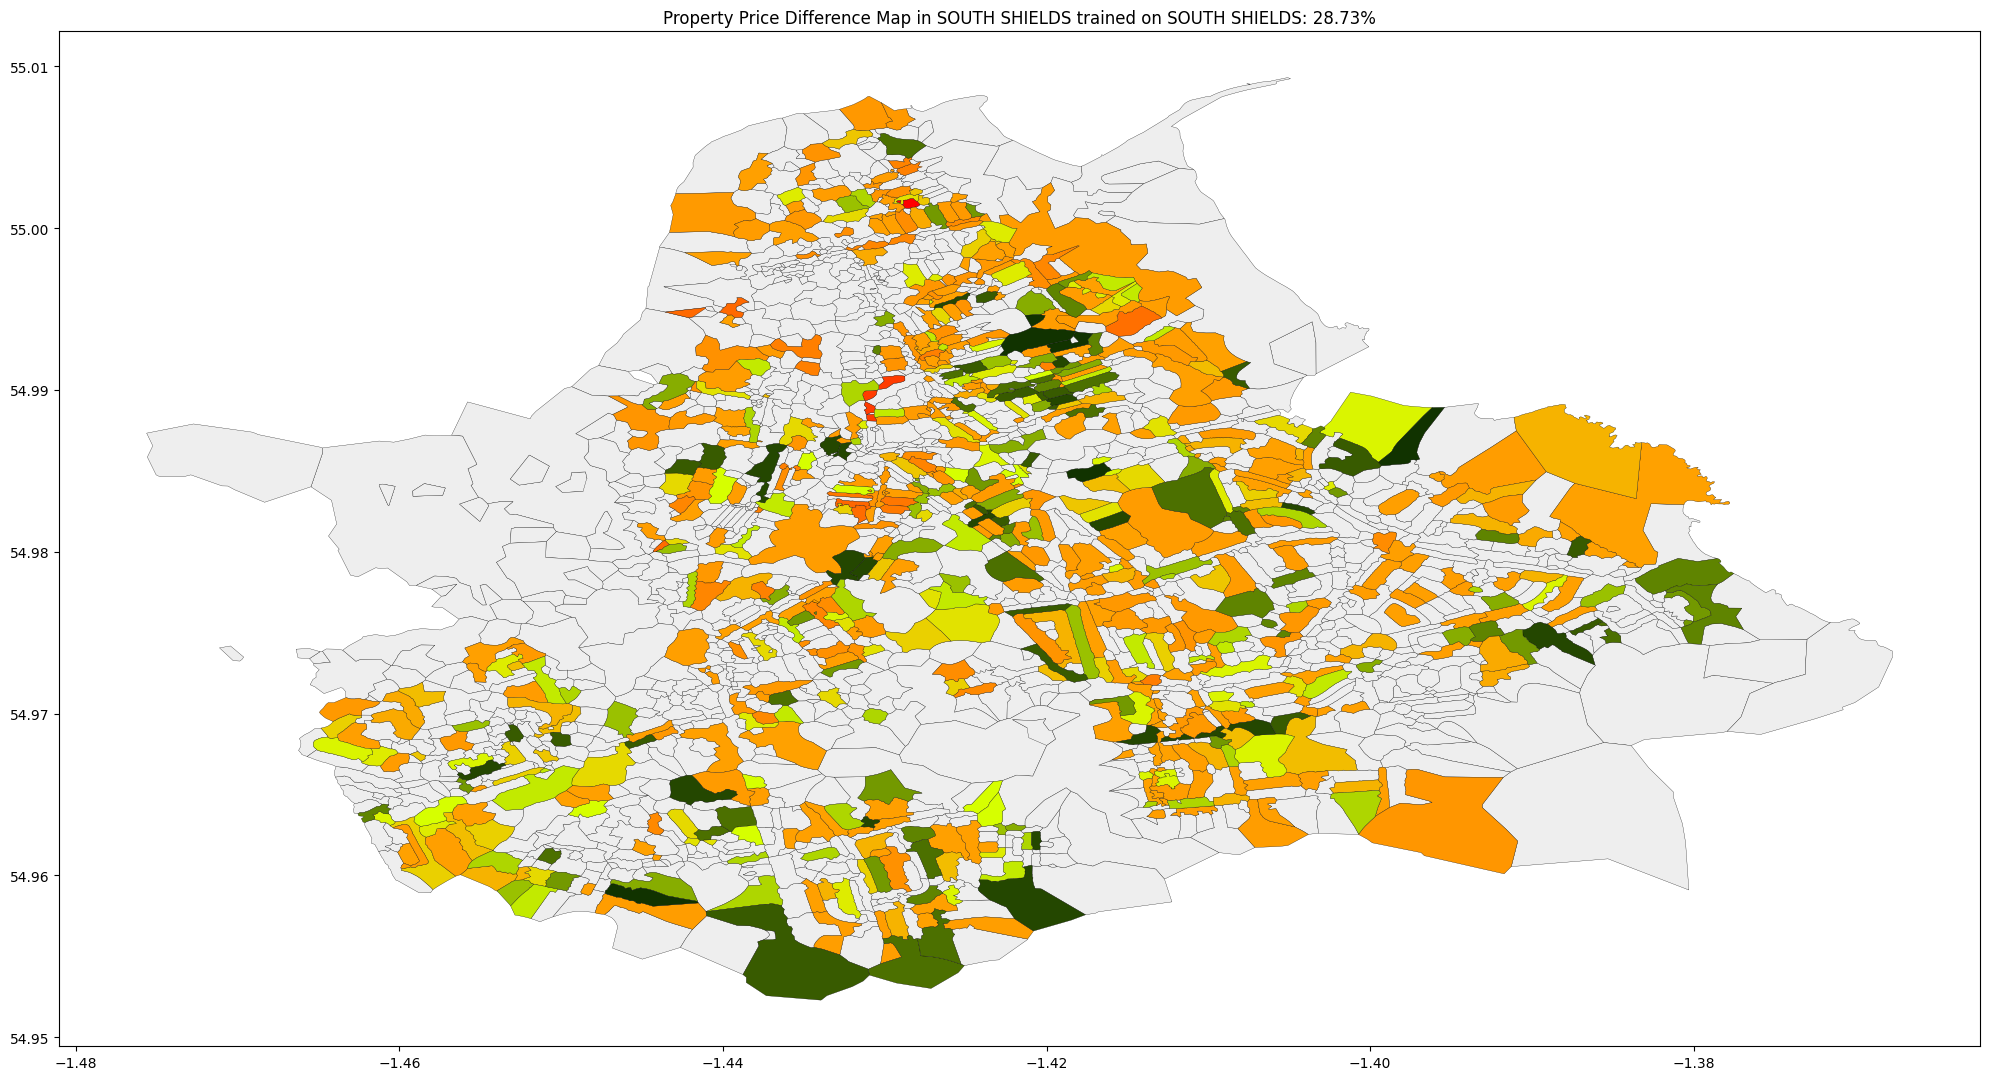

In [22]:
pppm = PropertyPricePlotManager(dt, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=True)

### LR

In [23]:
# Initialize the model
lr = LinearRegressionModel(model_data, feat_cols)

# Hyperparameter tuning
# lr.tune()

# Train the model
lr.train()

2023-09-18 19:21:17 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:52] - Colourised Module initialized
2023-09-18 19:21:24 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:130] - We are going to compare predictions now
2023-09-18 19:21:24 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:63] - Dataframe prepared
2023-09-18 19:21:24 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:88] - Merging geodata...
2023-09-18 19:21:26 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:99] - Metrics for area are to be settled
2023-09-18 19:21:33 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:101] - Assigning metrics colours
2023-09-18 19:21:54 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:192] - PPMapPlotter initialized


Number of decent predictions: 137
Total predictions: 630
Percentage of decent predictions: 21.75%


2023-09-18 19:21:55 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:342] - Saving images...
2023-09-18 19:22:00 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:484] - Saving results...


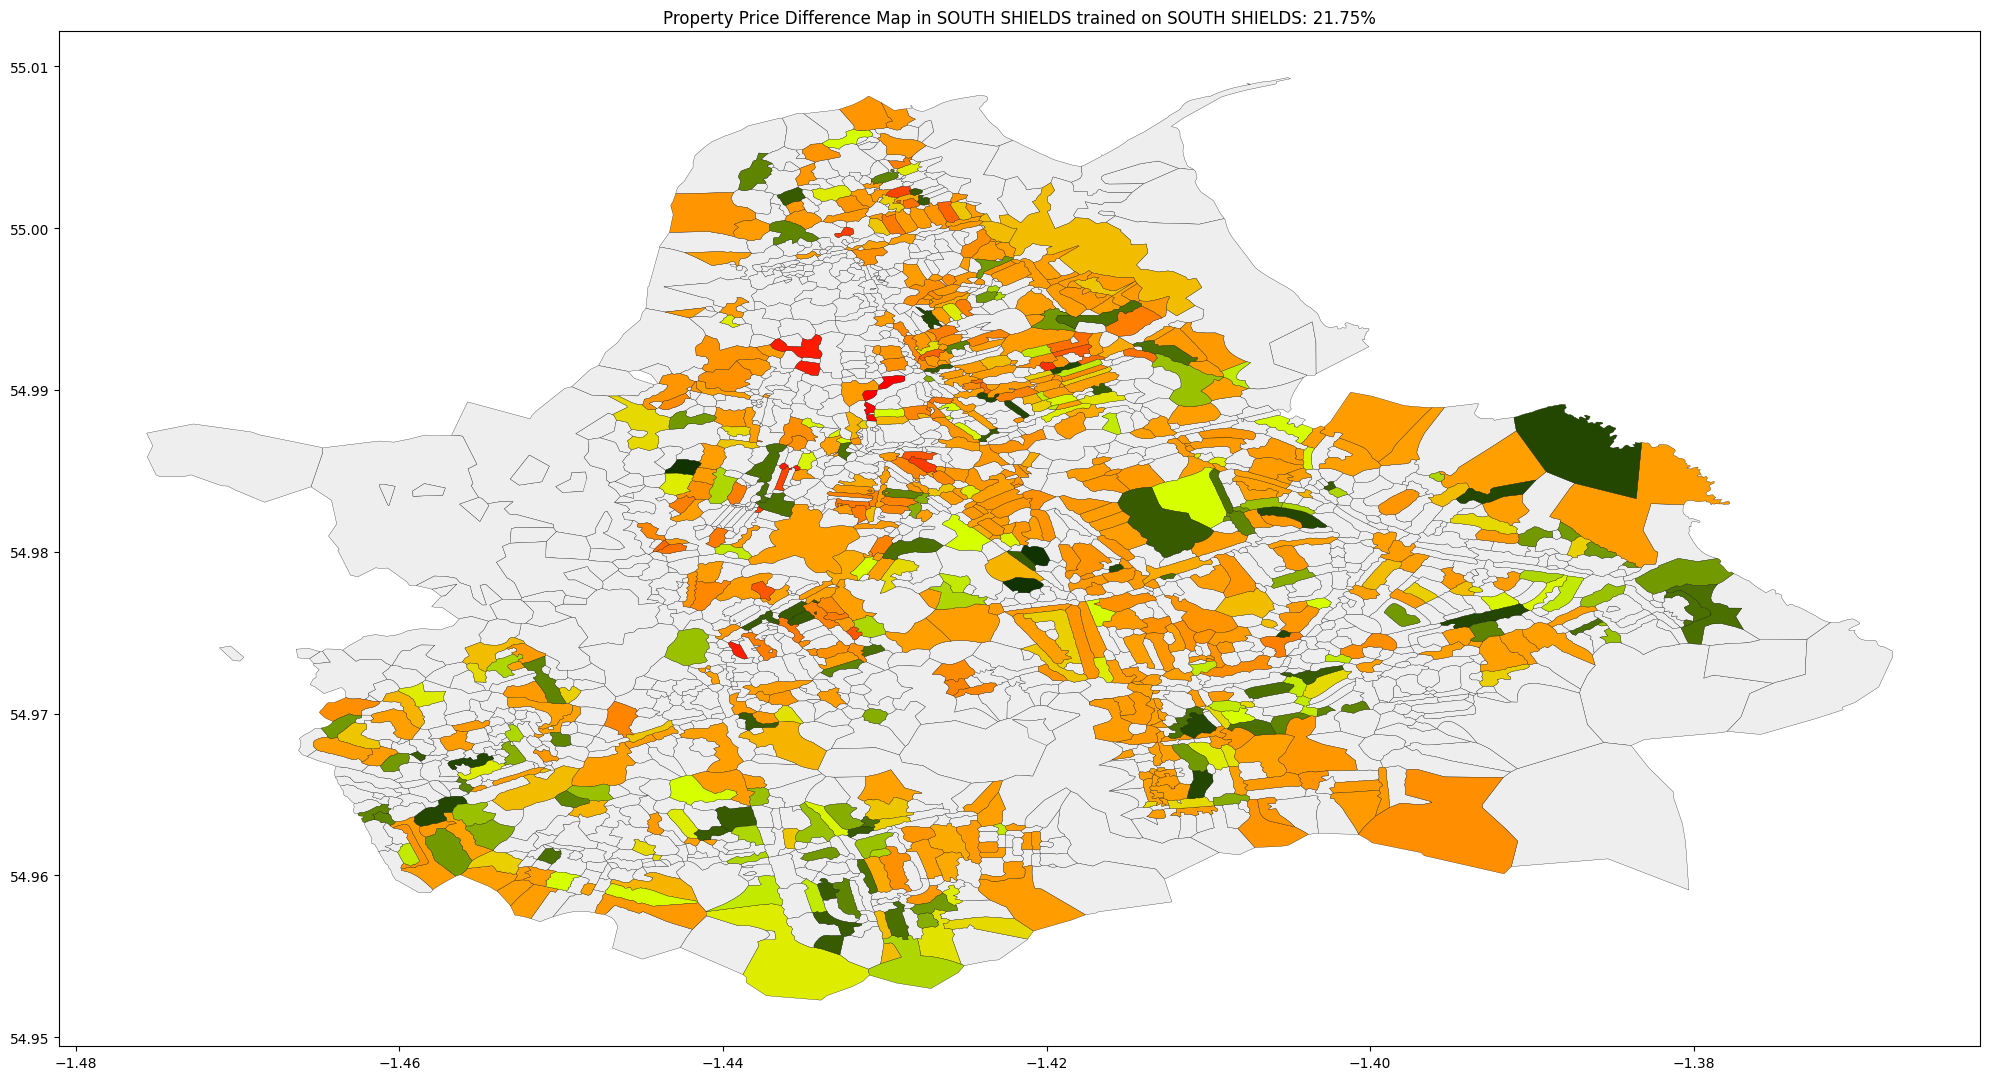

In [24]:
pppm = PropertyPricePlotManager(lr, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=False)

In [25]:
lr.tune()     # Tune the model to find best hyperparameters
lr.train()    # Train the model using the best hyperparameters
predictions = lr.predict("test")  # This should now work without errors

Best MAE on validation set: 0.35405857535177887
Best parameters: {'positive': False}


2023-09-18 19:22:03 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:52] - Colourised Module initialized
2023-09-18 19:22:10 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:130] - We are going to compare predictions now
2023-09-18 19:22:10 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:63] - Dataframe prepared
2023-09-18 19:22:10 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:88] - Merging geodata...
2023-09-18 19:22:11 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:99] - Metrics for area are to be settled
2023-09-18 19:22:19 - INFO - housedatautils.colourize_predictions_dataset - [colourize_predictions_dataset.py:101] - Assigning metrics colours
2023-09-18 19:22:39 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:192] - PPMapPlotter initialized


Number of decent predictions: 137
Total predictions: 630
Percentage of decent predictions: 21.75%


2023-09-18 19:22:40 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:342] - Saving images...
2023-09-18 19:22:45 - INFO - housedatautils.pp_map_plotter - [pp_map_plotter.py:484] - Saving results...


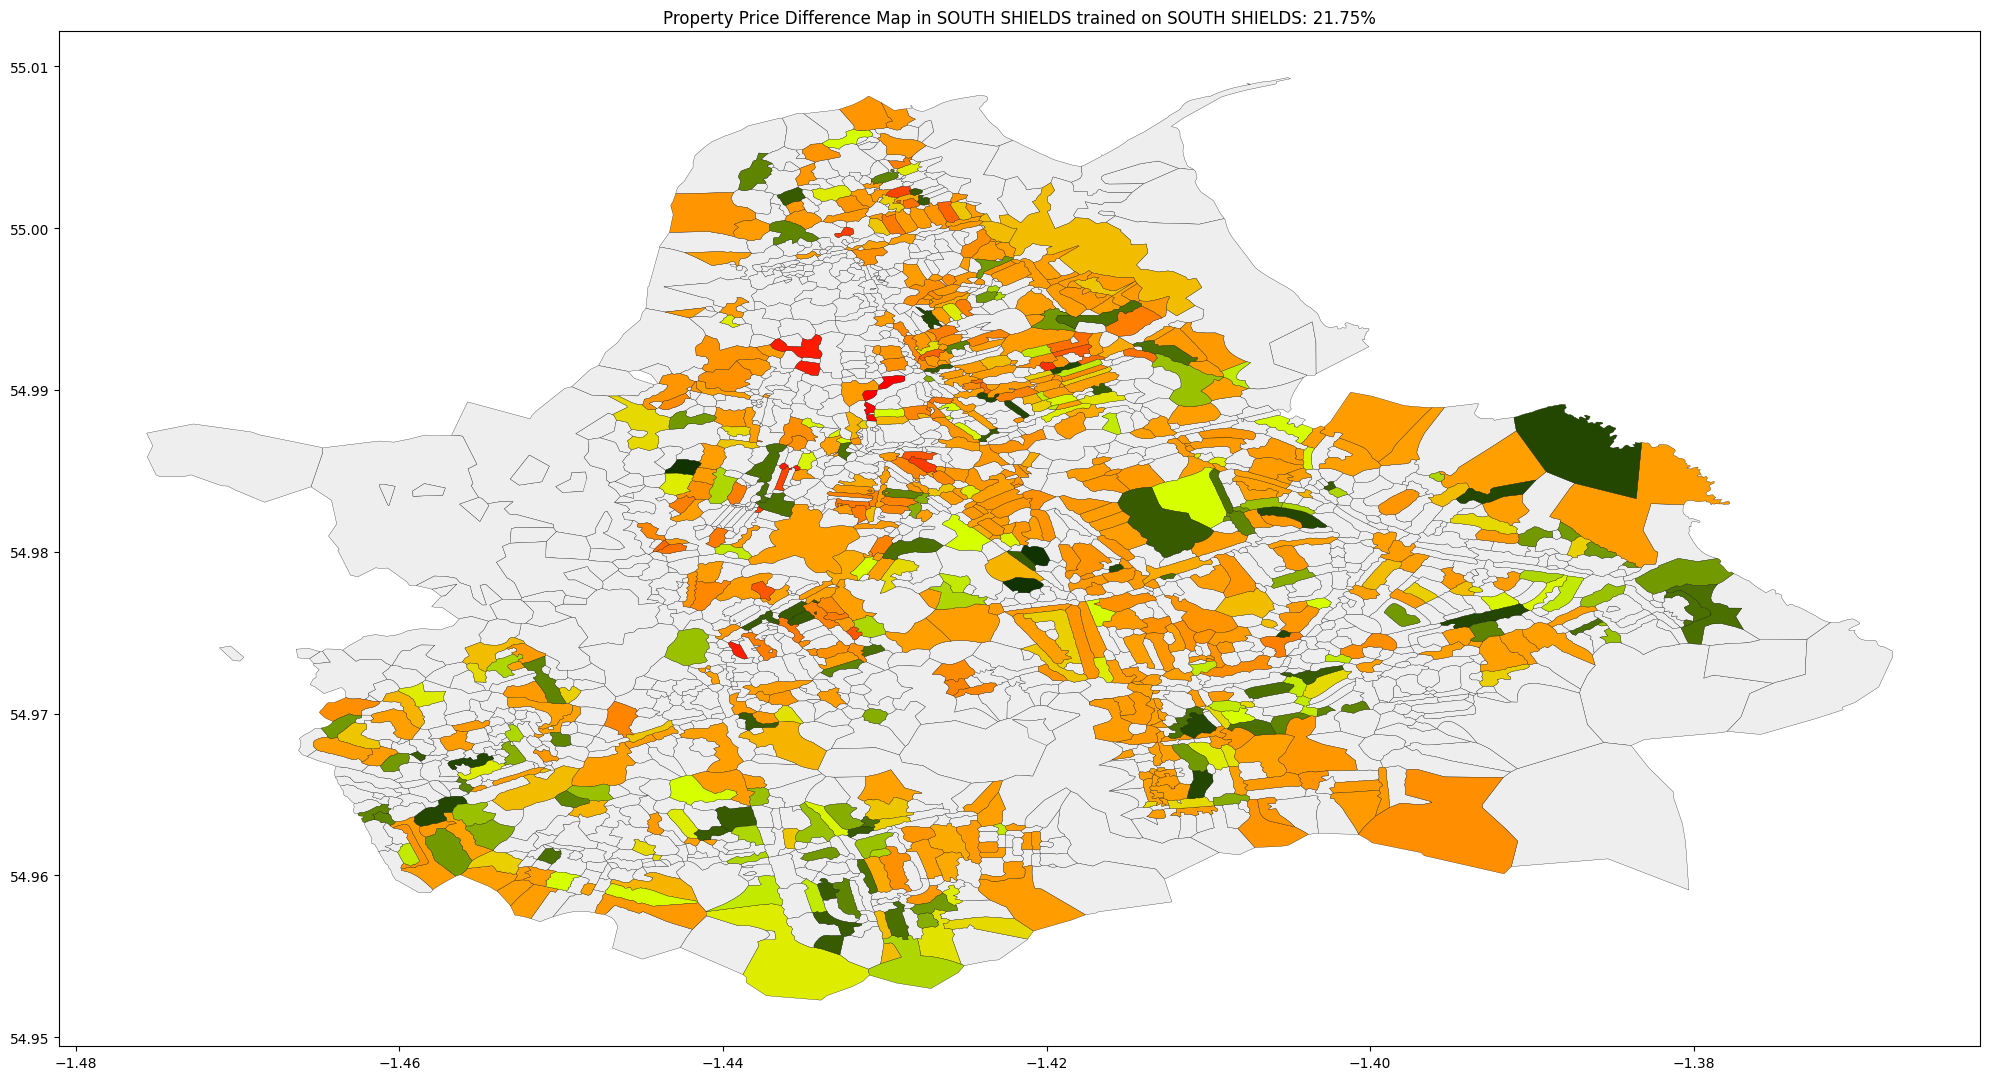

In [26]:
pppm = PropertyPricePlotManager(dt, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=True)

### XGBoost

In [27]:
# Initialize the model
xgb = XGBoostModel(model_data, feat_cols)

# Train the model
xgb.train()

In [ ]:
pppm = PropertyPricePlotManager(xgb, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=False)

In [ ]:
xgb.tune()     # Tune the model to find best hyperparameters
xgb.train()    # Train the model using the best hyperparameters
predictions = xgb.predict("test")  # This should now work without errors

In [ ]:
pppm = PropertyPricePlotManager(xgb, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=True)

### LightGBM

In [ ]:
# Initialize the model
lbm = LightGBMModel(model_data, feat_cols)

# Train the model
lbm.train()

In [ ]:
pppm = PropertyPricePlotManager(lbm, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=False)

In [ ]:
lbm.tune()     # Tune the model to find best hyperparameters
lbm.train()    # Train the model using the best hyperparameters
predictions = lbm.predict("test")  # This should now work without errors

In [ ]:
pppm = PropertyPricePlotManager(lbm, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=True)

### RNN

In [ ]:
# Initialize the model
rnn = RNNModel(model_data, feat_cols)
rnn.initialize_weights()

# Train the model
rnn.train()

rnn.original_y_test = np.exp(rnn.y_test_original)
rnn.predictions_test = np.exp(rnn.predictions)


In [ ]:
pppm = PropertyPricePlotManager(rnn, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=False)

In [ ]:
# Initialize the model
rnn = RNNModel(model_data, feat_cols)
rnn.initialize_weights()

# Train the model
rnn.tune()
rnn.train()

rnn.original_y_test = np.exp(rnn.y_test_original)
rnn.predictions_test = np.exp(rnn.predictions)

In [ ]:
pppm = PropertyPricePlotManager(rnn, postcode_mapping, house_data, geo_data, cities=cities)
pppm.get_results(tuned=True)